## Prueba - Fundamentos Data Science | Desafío 1: Determinantes del ingreso
### Cristian Vidal Muñoz

## Prueba - Hito 1

### Objetivo
Completar el punto de __Preliminares__, así como __Aspectos computacionales__.

__Elementos a considerar__
* Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. __(3 puntos)__
* Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. __(1 punto)__
* Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. __(1punto)__

__INTRODUCCION PROBLEMA:__

Con el objetivo de conocer las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo, debemos desarrollar un modelo predictivo sobre la posibilidad de que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base
a una serie de atributos sociodemográficos.

__TIPO DE PROYECTO:__

Este caso vamos a implementar un predictor de __clasificación binario__. El resultado o variable objetivo es de naturaleza __dicotómica__, donde tenemos que predecir si la salida pertenece a la __clase 1__ (sobre los 50.000 dolares anuales) o __clase 2__ (bajo los 50.000 dolares anuales). Utilizaremos algoritmos de __machine learning de clasificación__ con probabilidades como __LogisticRegression__, aplicaremos la __función logística__ o también llamada __sigmoide__ para obtener la probabilidad, si la salida de la __función sigmoide__ es mayor que 0.5, podemos clasificar el resultado como 1 o sobre50 (sobre los 50.000 dólares anuales) , y si es menor que 0.5 podemos clasificarlo como 0 o bajo50 (bajo los 50.000 dólares anuales). Por su parte si el resultado por ejemplo es .80, podemos decir en términos de probabilidad como, hay un 80% de probabilidades de que el individuo tenga un salario sobre los 50.000 dólares anuales y un 20% de probabilidades de tener un salario bajo los 50.000 dólares anuales.

__METRICAS:__

Algunas de las métricas que utilizaremos para evaluar el __desempeño__ y __precisión__ de nuestro modelo serán:
la __Matriz de Confusión__, analizaremos los resultados predichos por nuestro modelo con los datos __"reales"__ (Verdaderos Positivos, Verdaderos Negativos, Falsos Positivos, Falsos Negativos). Las medidas de desempeño a medir serán las siguientes: __Exactitud, Precisión, Sensibilidad o Recall y Puntaje de F1__. Tambien es importante saber "que tan bueno" puede distinguir el modelo entre dos cosas, para esto utilizaremos __La curva AUC-ROC__.

__LIBRERIAS Y MODULOS:__

Desarrollaremos este caso utilizando la __Suite__ de __Anaconda python__. Para la manipulación, operaciones y preparación de los datos usaremos __Pandas__ y __NumPy__.  Para la visualización de los datos utilizaremos __missingno (matrix)__, __matplotlib (plt)__ y __Seaborn (sns)__. Nuestro análisis estadístico y econométrico lo haremos con __Statsmodels (smf.logit)__. Para los algoritmos de Machine Learning, validaciones y metricas de desempeño utilizaremos __Scikit-learn (LogisticRegression, train_test_split, classification_report, auc, roc_auc_score, roc_curve)__.

## Prueba - Hito 2

### Objetivo

Completar el punto de __Descripción__.

sección llamada __Descripción__ donde se generará un análisis descriptivo considerando el
tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección
debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre
las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento
(datos perdidos, recodificaciones).

### Elementos a considerar
* La inspección visual del vector objetivo. (2 puntos)
* La inspección visual de las variables. (2 puntos)
* La inspección de datos perdidos en las variables. (1 punto)

De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#Importamos funciones auxiliares
import helpers as funcion_auxiliar

#Configuración de graficos
plt.style.use('ggplot')

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df.shape[0], df.shape[1]))

Cantidad de registros:48842, Cantidad de columnas: 15


### Aspectos adicionales a considerar

### La base de datos contiene los valores perdidos como ? . Deberá transformarlos para poder trabajar de forma adecuada.

In [5]:
df = df.replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


__Los datos con valores igual a "?" fueron transformados por NaN__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Inspección de datos perdidos en las variables

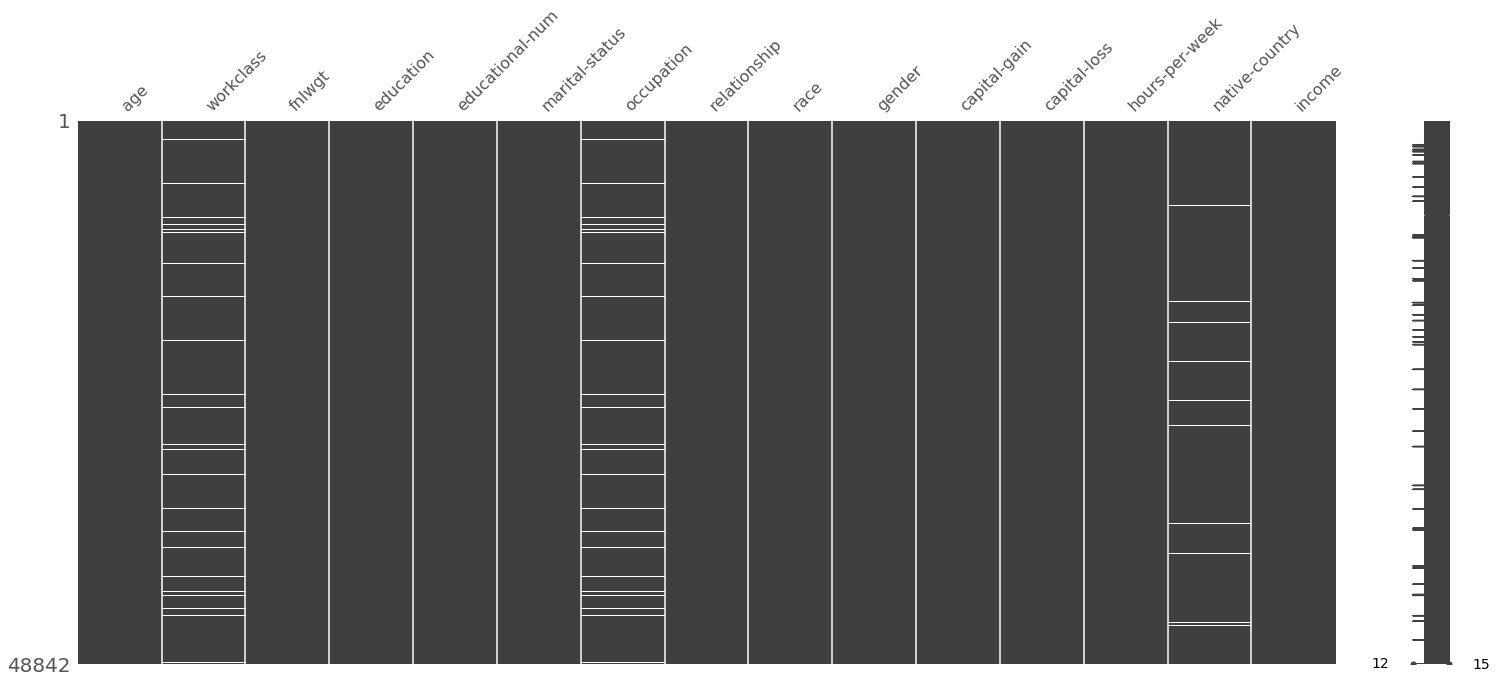

In [7]:
missingno.matrix(df)

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

* La variable occupation tiene 2.809 datos perdidos
* La variable workclass tiene 2.799 datos perdidos
* La variable native-country tiene 857 datos perdidos 

In [9]:
variables_con_datos_perdidos = ['workclass', 'occupation', 'native-country']
funcion_auxiliar.obtener_porcentaje_datos_perdidos(df, variables_con_datos_perdidos)

workclass 0.057
occupation 0.058
native-country 0.018


* El porcentaje de datos perdidos de la variable __Workclass__ es __5.7%__
* El porcentaje de datos perdidos de la variable __occupation__ es __5.8%__
* El porcentaje de datos perdidos de la variable __native-country__ es __1.8%__

__>> La variable con mayor cantidad de valores perdidos es "occupation" con 5.8%__

In [10]:
df_dropped = df.dropna()
df_dropped.shape

(45222, 15)

####  Podemos observar que si aplicamos dropna a nuestro dataframe, eliminaríamos alrededor de 3.620 registros,  considero que seria un error eliminar estos registros, NO vamos aplicar dropna en nuestro dataframe

## Proceso de preprocesamiento y recodificación de las variables

### Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:

* __occupation__ debe recodificarse como __collars__ siguiendo una nomenclatura similar a:
    * __white-collar__  $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
    * __blue-collar__  $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
    * __others__  $\leftarrow$ Other-service, Armed-Forces

In [11]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
#occupation -> white-collar
df['occupation'] = df['occupation'].replace(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'],
                                                    ['white-collar','white-collar','white-collar', 'white-collar', 'white-collar'])
#occupation -> blue-collar
df['occupation'] = df['occupation'].replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv'],
                                                    ['blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar'])
#occupation -> others
df['occupation'] = df['occupation'].replace(['Other-service', 'Armed-Forces'],
                                                    ['others', 'others'])

#Renombramos la columna occupation por collars
df = df.rename(columns={"occupation": "collars"})

In [13]:
df['collars'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: collars, dtype: int64

* __workclass__ debe recodificarse como __workclass_recod__ siguiendo una nomenclatura similar a :
    * __federal-gov__ $\leftarrow$ Federal-gov.
    * __state-level-gov__ $\leftarrow$ State-gov, Local-gov.
    * __self-employed__ $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    * __unemployed__ $\leftarrow$ Never-worked, Without-pay.

In [14]:
#Validamos frecuencias de nuestra variable workclass
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
#workclass -> federal-gov
df['workclass'] = df['workclass'].replace(['Federal-gov'],['federal-gov'])

#workclass -> state-level-gov
df['workclass'] = df['workclass'].replace(['State-gov', 'Local-gov'],['state-level-gov', 'state-level-gov'])

#workclass -> self-employed
df['workclass'] = df['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'],['self-employed', 'self-employed'])

#workclass -> unemployed
df['workclass'] = df['workclass'].replace(['Never-worked', 'Without-pay'],['unemployed', 'unemployed'])

#Renombramos la columna workclass por workclass_recod
df = df.rename(columns={"workclass": "workclass_recod"})

In [16]:
#Validamos frecuencias de nuestra variable workclass
df['workclass_recod'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass_recod, dtype: int64

* __education__ debe recodificarse como __educ_recod__ siguiendo una nomenclatura similar a :
    * __preschool__ $\leftarrow$ Preschool
    * __elementary-school__ $\leftarrow$ 1st-4th, 5th-6th
    * __high-school__ $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
    * __college__ $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    * __university__ $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate

In [17]:
#Validamos frecuencias de nuestra variable education
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [18]:
#education -> preschool
df['education'] = df['education'].replace(['Preschool'],['preschool'])

#education -> elementary-school
df['education'] = df['education'].replace(['1st-4th', '5th-6th'],['elementary-school', 'elementary-school'])

#education -> high-school
df['education'] = df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad'],['high-school', 'high-school', 'high-school', 'high-school', 'high-school', 'high-school'])

#education -> college
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Some-college'], ['college', 'college', 'college'])

#education -> university
df['education'] = df['education'].replace(['Bachelors', 'Masters', 'Prof-school', 'Doctorate'], ['university', 'university', 'university', 'university'])

#Renombramos la columna education por educ_recod
df = df.rename(columns={"education": "educ_recod"})

In [19]:
#Validamos frecuencias de nuestra variable education
df['educ_recod'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: educ_recod, dtype: int64

* __marital-status__ debe recodificarse como __civstatus__ siguiendo una nomenclatura similar a:
    * __married__ $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
    * __divorced__ $\leftarrow$ Divorced
    * __separated__ $\leftarrow$ Separated
    * __widowed__ $\leftarrow$ Widowed.

In [20]:
#Validamos frecuencias de nuestra variable marital-status
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [21]:
#marital-status -> married
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],['married', 'married', 'married'])

#marital-status -> divorced
df['marital-status'] = df['marital-status'].replace(['Divorced'],['divorced'])

#marital-status -> separated
df['marital-status'] = df['marital-status'].replace(['Separated'],['separated'])

#marital-status -> widowed
df['marital-status'] = df['marital-status'].replace(['Widowed'],['widowed'])

#Renombramos la columna marital-status por civstatus
df = df.rename(columns={"marital-status": "civstatus"})

In [22]:
#Validamos frecuencias de nuestra variable marital-status
df['civstatus'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64

* __native-country__ debe recodificarse como __region__ donde cada país debe asignarse a uno de los 5 continentes

In [23]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [24]:
#native-country -> america
df['native-country'] = df['native-country'].replace([
    'United-States', 'Mexico', 'Puerto-Rico',
    'Canada', 'El-Salvador', 'Cuba',
    'Jamaica', 'Dominican-Republic', 'Guatemala',
    'Columbia', 'Haiti', 'Nicaragua',
    'Peru', 'Ecuador', 'Trinadad&Tobago', 
    'Outlying-US(Guam-USVI-etc)', 'Honduras'
],[
    'america', 'america', 'america', 
    'america', 'america', 'america', 
    'america', 'america', 'america',
    'america', 'america', 'america',
    'america', 'america', 'america',
    'america', 'america'
])

#native-country -> asia
df['native-country'] = df['native-country'].replace([
    'Philippines', 'India', 'China',
    'Japan', 'Vietnam', 'Taiwan',
    'Iran', 'Hong', 'Thailand',
    'Cambodia', 'Laos', 'South'
],[
    'asia', 'asia','asia', 
    'asia', 'asia', 'asia', 
    'asia', 'asia', 'asia',
    'asia', 'asia','asia'
])


#native-country -> europa
df['native-country'] = df['native-country'].replace([
    'Germany', 'England', 'Italy',
    'Poland', 'Portugal', 'Greece',
    'France', 'Ireland', 'Yugoslavia',
    'Scotland', 'Hungary', 'Holand-Netherlands'
],[
    'europa', 'europa','europa', 
    'europa', 'europa', 'europa', 
    'europa', 'europa', 'europa',
    'europa', 'europa','europa'
])

#Renombramos el nombre de la columna
df = df.rename(columns={"native-country": "region"})

In [25]:
df["region"].value_counts()

america    46109
asia        1096
europa       780
Name: region, dtype: int64

In [26]:
round(df["region"].value_counts('%'), 2)

america    0.96
asia       0.02
europa     0.02
Name: region, dtype: float64

Podemos observar que el 96% de los datos de la muestra son del continente americano.

* __income__ debe recodificarse de forma binaria.

In [27]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [28]:
df['income'] = np.where(df['income'] == '>50K', 1, 0)

In [29]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [30]:
df.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
26366,21,Private,164920,college,10,Never-married,others,Own-child,White,Female,0,0,40,america,0
24978,38,self-employed,217054,college,10,divorced,blue-collar,Not-in-family,White,Male,0,0,40,america,0
24774,49,Private,105431,high-school,9,divorced,others,Not-in-family,Black,Female,0,0,40,america,0
18082,38,Private,204640,college,10,widowed,white-collar,Unmarried,Black,Female,0,0,40,america,0
40021,62,state-level-gov,114045,high-school,9,divorced,others,Not-in-family,White,Female,0,0,35,america,0


## Inspección visual de las variables

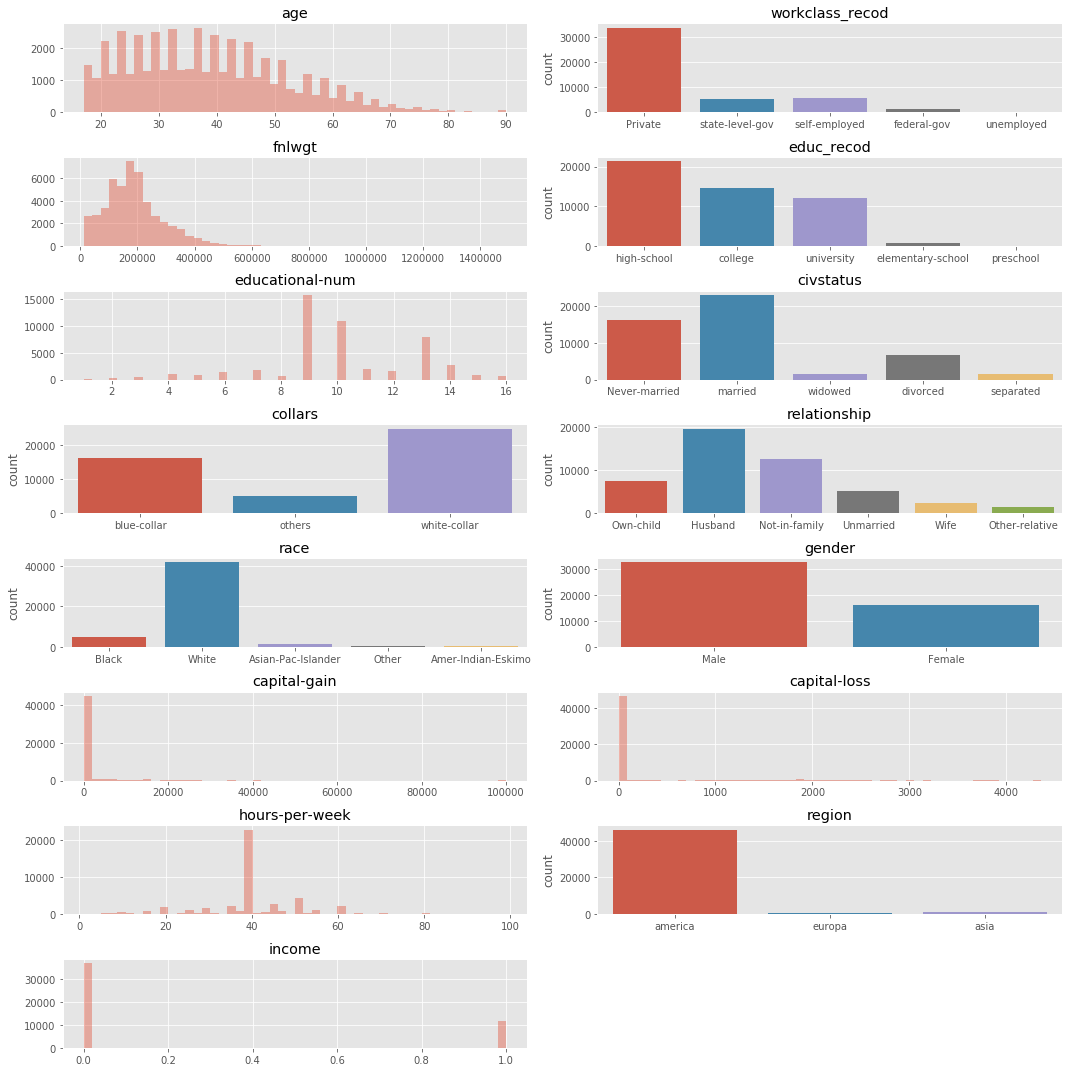

In [31]:
plt.rcParams['figure.figsize'] = (15, 15)
funcion_auxiliar.explorar_variables(df)

#### Visualizar Estadísticas descriptivas

In [32]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


__age__
* Observamos que el promedio de edad de las personas de la muestra es __38 años__, la edad mínima es __17 años__ y la edad máxima es __90 años__, si bien el __75%__ de las personas no superan los __48 años__, existen personas mayores de __75 años__ que aún trabajan.

__workclass_recod__
* A simple vista podemos notar que la mayoría de las personas de la muestra trabajan en el sector __privado__.

__educ_recod__
* La mayoría de las personas tienen un titulo de secundaria (7mo-8vo, 1ro medio, 2do medio, 3ro medio, Secundaria completa), seguido de personas que tienen un titulo de nivel superior.

__civstatus__
* La mayoría de las personas de la muestra están casados/as (casadas, cónyuge civil), seguido por personas solteras/os.

__collars__
* La mayoría de las personas de la muestra trabajan en la categoría __"white-collar"__ es decir trabajan como Profesores, Ejecutivo administrativos, Administrativos servicio al cliente, Ventas o Soporte técnico.

__relationship__
* La mayoría de las personas de la muestra están en una relación como __"esposo"__.

__race__
* La mayoría de las personas de la muestra son de raza __"Blanco caucásico"__.

__gender__
* La mayoría de las personas de la muestra son de genero __"masculino"__.

__capital-gains__
* Se puede observar que muy pocas personas tienen ingresos generados por inversiones fuera del trabajo.

__capital-losses__
* La mayoría de las personas de la muestra no invierten mucho (fuera del trabajo), por este motivo las personas no tienen perdidas generadas por inversiones.

__hours-per-week__
* Observamos que el promedio de la cantidad de horas trabajadas por semana es 40,4. El 75% de las personas trabajan alrededor de 45 horas por semana.

__region__
* La mayoría de las personas de la muestra son del continente __americano__.

__income__
La mayoría de las personas de la muestra tienen __ingresos inferiores a 50.000 dolares anuales__.

## Inspección visual del vector objetivo

In [33]:
var_numericas, var_categoricas = funcion_auxiliar.get_var_categoricas_numericas(df)
print("Las variables numéricas son {}".format(var_numericas))
print("Las variables catergóricas son {}".format(var_categoricas))

Las variables numéricas son ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
Las variables catergóricas son ['workclass_recod', 'educ_recod', 'civstatus', 'collars', 'relationship', 'race', 'gender', 'region']


###  Inspección visual variables categóricas -> vector objetivo

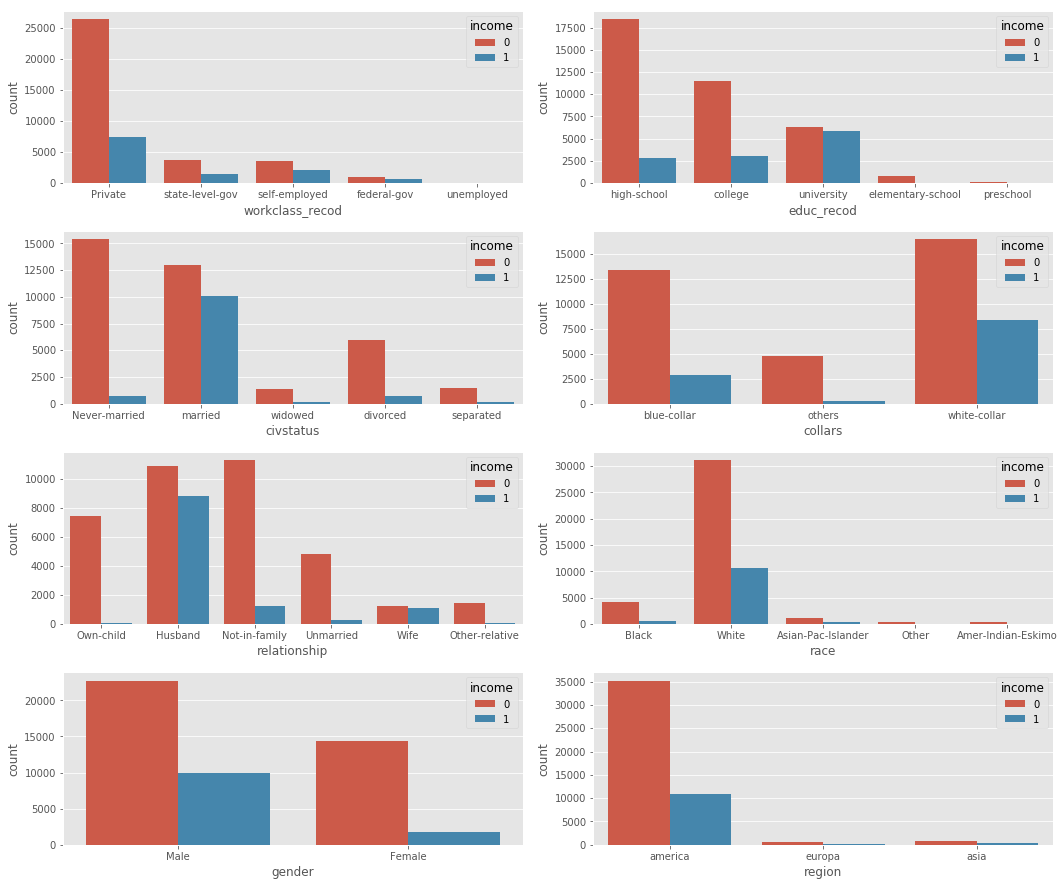

In [34]:
fig = plt.figure(figsize=(15,15))
funcion_auxiliar.inspeccionar_vector_objetivo(df, var_categoricas, 'income')

__Podemos observar que muy pocas personas de la muestra tienen ingresos superiores a los 50.000 dolares anuales, pero a simple vista podemos ver que para aquellas personas que tienen un titulo universitario o que están en una relación/estado civil como "Casado/a", existe una cantidad significativa de individuos que tienen ingresos superiores a los 50.000 dolares anuales.__

### Inspección visual variables numéricas -> vector objetivo

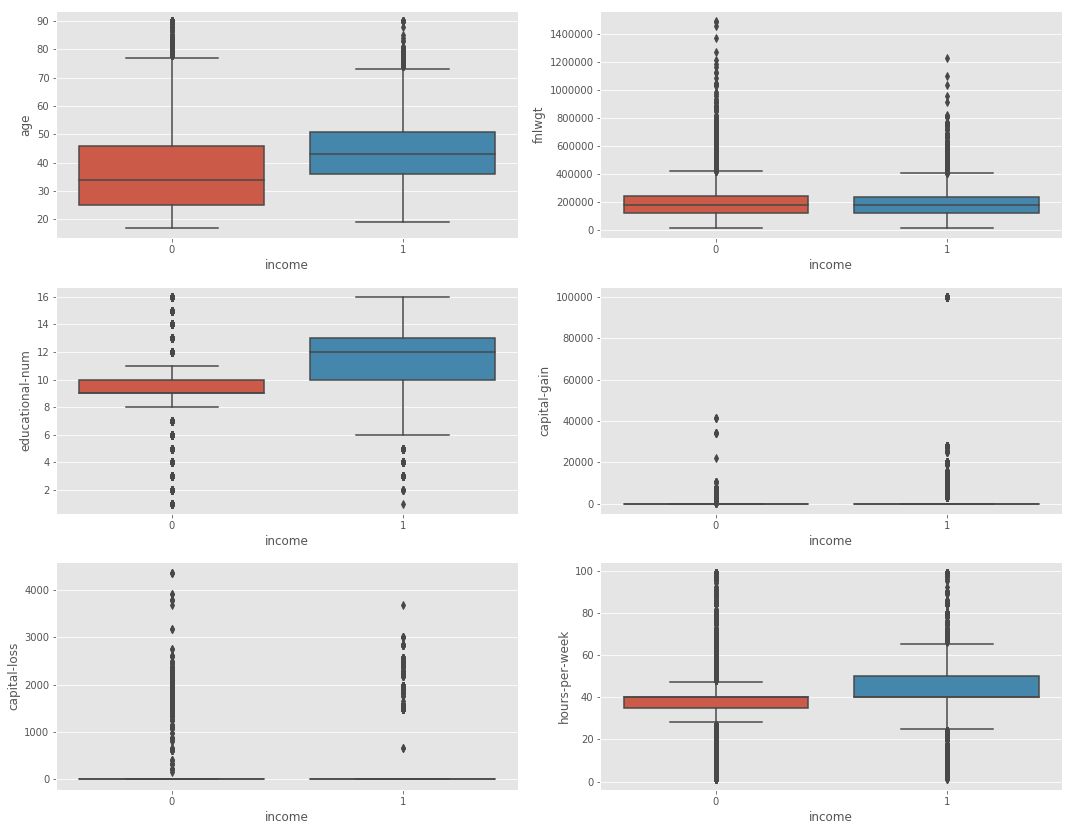

In [35]:
fig = plt.figure(figsize=(15,15))
funcion_auxiliar.inspeccionar_vector_objetivo(df, var_numericas, 'income', 'boxplot')

* __Podemos observar que las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen mas edad en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.
* __Las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen mas años de estudios en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.
* __Las personas que tienen ingresos superiores a los 50.000 dolares anuales trabajan mas horas semanales en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.

## Nivel de Asoción entre variables

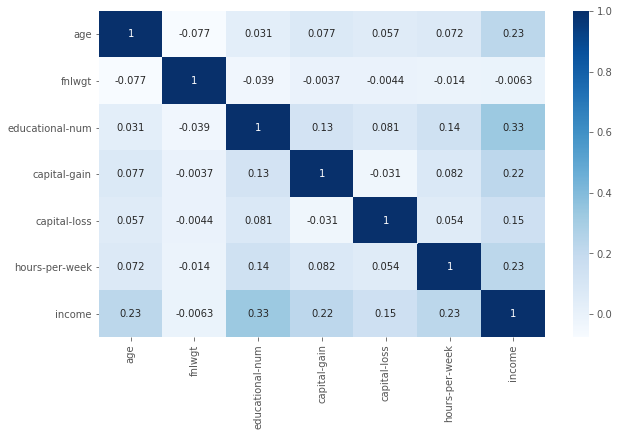

In [36]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="Blues")

* Podemos observar una correlación muy baja entre __income__ y __age__ de __.23__
* Podemos observar una correlación baja entre income y  .....
* pendiente
* pendiente